In [1]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, lfilter, iirfilter, butter
import pywt
from numpy import linspace, max, min, average, std, array, diff, fabs, sqrt, power, round
from scipy.integrate import simps
import biosignalsnotebooks as bsnb


48450


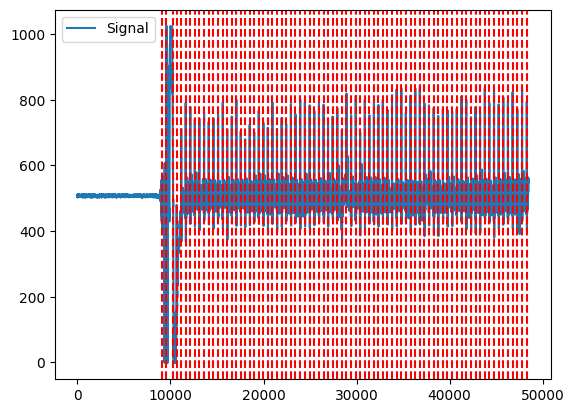

In [2]:

# Nombre de tu archivo TXT
archivo_txt = "s3activocorregido.txt"

# Cargar los datos desde el archivo TXT
datos_ecg = np.loadtxt(archivo_txt)

ecg_signal = datos_ecg[:, 5]  # El índice 5 representa la sexta columna (0-indexed)

# Retrieve ECG data from data folder
#ecg_signal = nk.data(dataset="ecg_1000hz")
print(len(ecg_signal))
# Crear un arreglo de tiempo en segundos
frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
tiempo = np.arange(len(ecg_signal)) / frecuencia_muestreo

# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=1000)

# Visualize R-peaks in ECG signal

plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

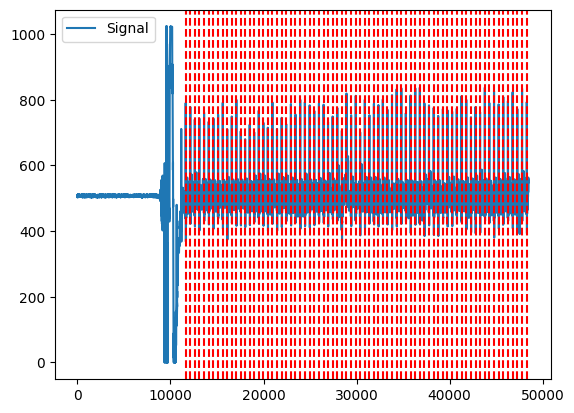

In [3]:
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][5:], ecg_signal[:50000])

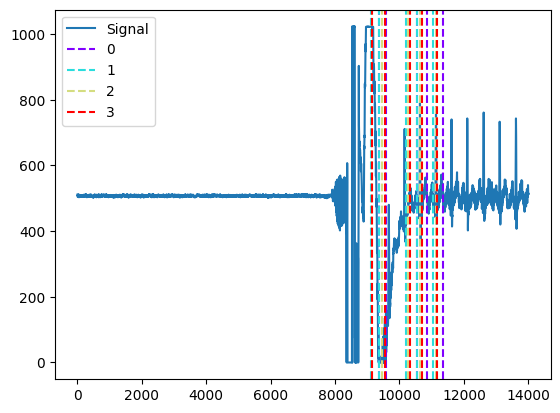

In [4]:
#Luego de identificar los r peaks procedemos a 
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=100, method="peak")

start_index = 1000 
end_index = 15000  
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5], 
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], ecg_signal[start_index:end_index])


### Metodo Peaks

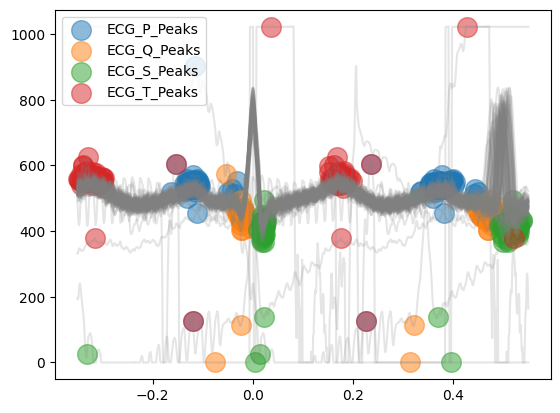

In [5]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(ecg_signal, 
                                 rpeaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

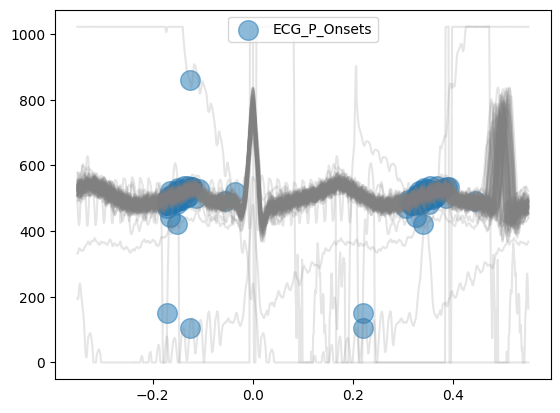

In [6]:
# Delineate the ECG signal and visualizing all P-peaks boundaries
signal_peak, waves_peak = nk.ecg_delineate(ecg_signal, 
                                           rpeaks, 
                                           sampling_rate=1000,
                                           method="peak", 
                                           show=True, 
                                           show_type='bounds_P')

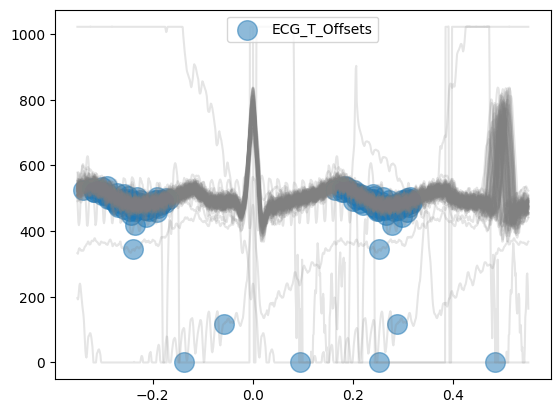

In [7]:
# Delineate the ECG signal and visualizing all T-peaks boundaries
signal_peaj, waves_peak = nk.ecg_delineate(ecg_signal, 
                                           rpeaks, 
                                           sampling_rate=1000, 
                                           method="peak", 
                                           show=True, 
                                           show_type='bounds_T')

### Discrete Wavelet

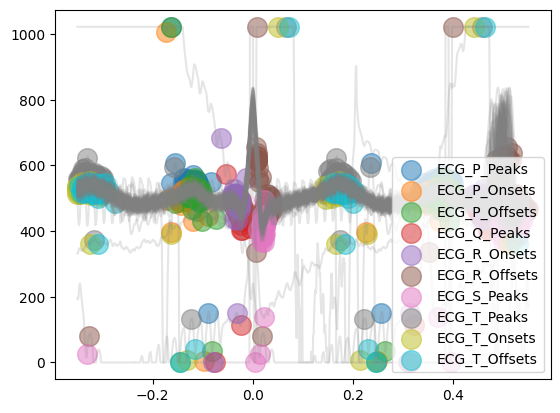

In [8]:
# Delineate the ECG signal
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='all')

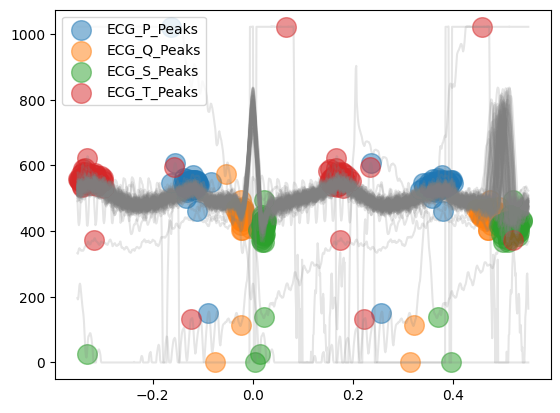

In [9]:
# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='peaks')

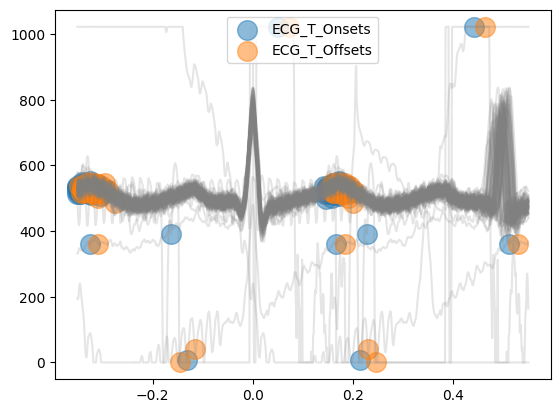

In [10]:
# visualize T-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='bounds_T')

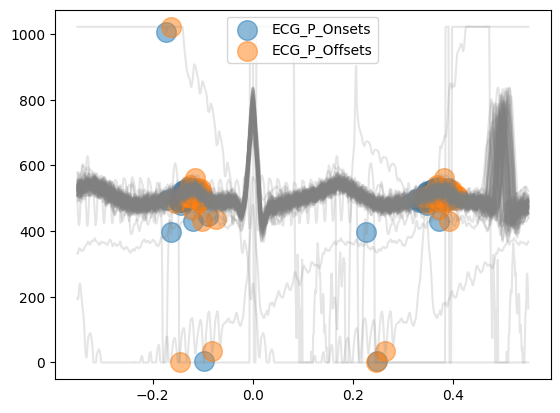

In [11]:
# Visualize P-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='bounds_P')

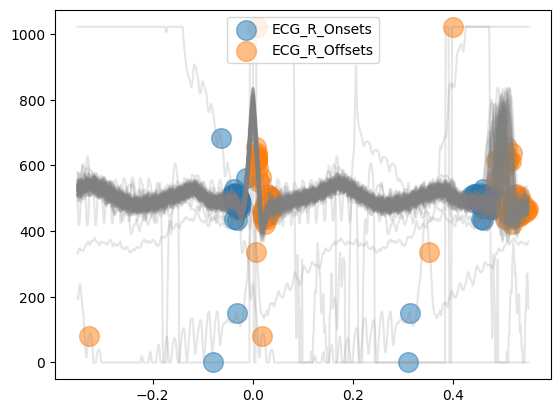

In [12]:
# Visualize R-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='bounds_R')

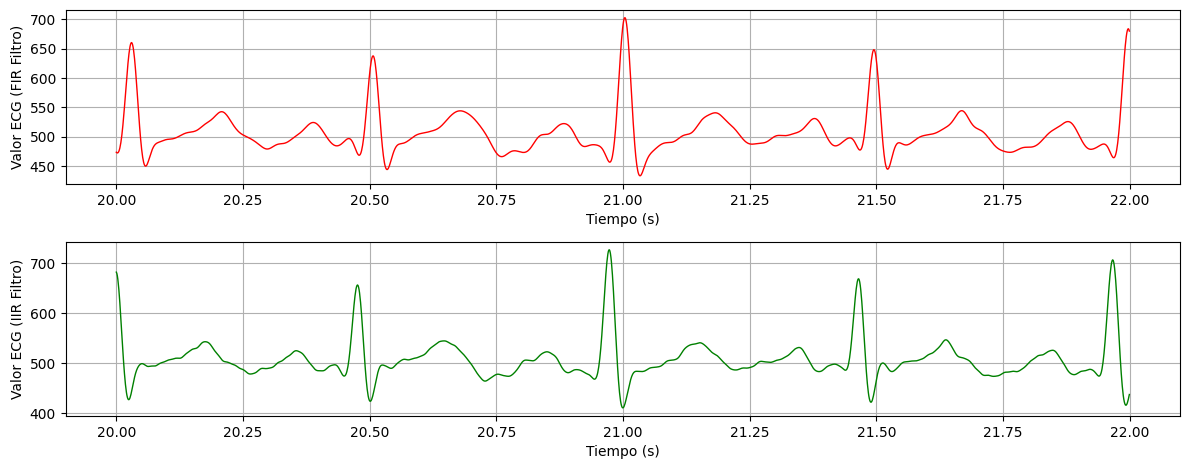

In [18]:
frecuencia_muestreo = 1000
tiempo = np.arange(len(ecg_signal)) / frecuencia_muestreo

inicio_segundo = 20
fin_segundo = 22
inicio_muestra = int(inicio_segundo * frecuencia_muestreo)
fin_muestra = int(fin_segundo * frecuencia_muestreo)

# Frecuencia de corte de los filtros
cutoff_frequency_fir = 0.05
cutoff_frequency_iir = 0.05

num_taps = 101
fir_filter = firwin(num_taps, cutoff_frequency_fir)
iir_filter = iirfilter(N=4, Wn=cutoff_frequency_iir, btype='low', ftype='butter')
wavelet_filter = 'db4'

# Aplicar los filtros
ecg_fir = lfilter(fir_filter, 1.0, ecg_signal)
ecg_iir = lfilter(iir_filter[0], iir_filter[1], ecg_signal)
ecg_wavelet, _ = pywt.dwt(ecg_signal, wavelet_filter)

plt.figure(figsize=(12, 9))
plt.subplot(4, 1, 2)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg_fir[inicio_muestra:fin_muestra], lw=1, color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor ECG (FIR Filtro)')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg_iir[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor ECG (IIR Filtro)')
plt.grid(True)

plt.tight_layout()
plt.show()

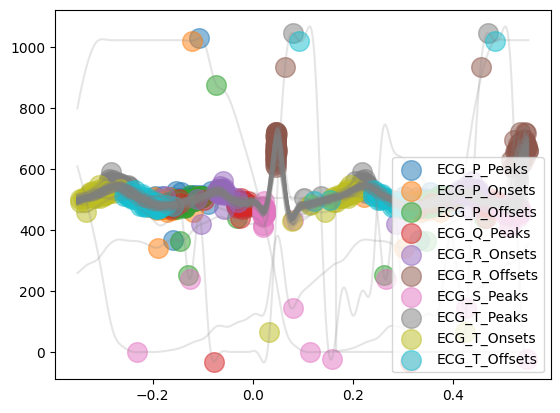

In [14]:
# Delineate the ECG signal with filtered signal
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_fir, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='all')

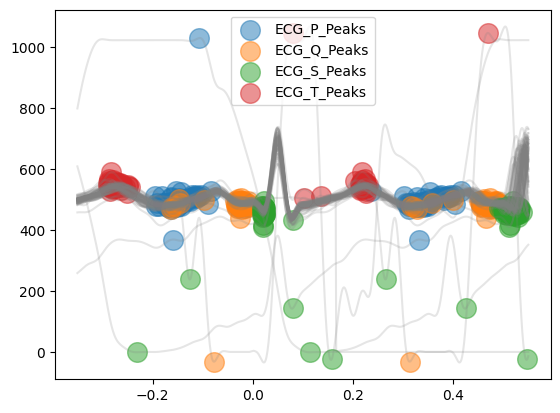

In [15]:
# Visualize P-peaks and T-peaks with filterd signal
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_fir, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='peaks')

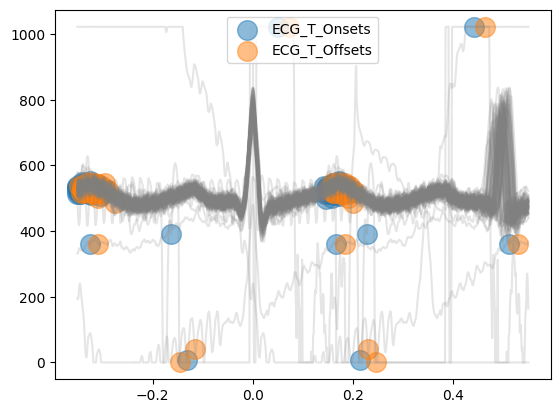

In [16]:
# visualize T-wave boundaries with filtered signal
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='bounds_T')

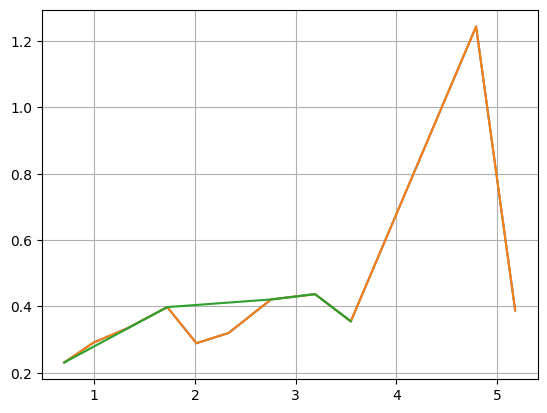

{'Maximum RR': 0.4370180377265034, 'Minimum RR': 0.23100953481652708, 'Average RR': 0.3684152061749289, 'Maximum BPM': 259.72953907575, 'Minimum BPM': 137.29410417962993, 'Average BPM': 162.859727270625, 'SDNN': 0.0740398035927047}


In [19]:
#Generación del tachogram (señal)
tachogram_data, tachogram_time = bsnb.tachogram(ecg_wavelet, frecuencia_muestreo, signal=True, out_seconds=True)
plt.plot(tachogram_time, tachogram_data)

#Remover beats ectopicos
tachogram_data_NN, tachogram_time_NN = bsnb.remove_ectopy(tachogram_data, tachogram_time)
bpm_data = (1 / array(tachogram_data_NN)) * 60
plt.plot(tachogram_time, tachogram_data)
plt.plot(tachogram_time_NN, tachogram_data_NN)

plt.grid(True)
plt.show()

#Extracción de parámetros temporales (BPM)
# Maximum, Minimum and Average RR Interval
max_rr = max(tachogram_data_NN)
min_rr = min(tachogram_data_NN)
avg_rr = average(tachogram_data_NN)

# Maximum, Minimum and Average Heart Rate
max_hr = 1 / min_rr # Cycles per second
max_bpm = max_hr * 60 # BPM

min_hr = 1 / max_rr # Cycles per second
min_bpm = min_hr * 60 # BPM

avg_hr = 1 / avg_rr # Cyles per second
avg_bpm = avg_hr * 60 # BPM

# SDNN
sdnn = std(tachogram_data_NN)

time_param_dict = {"Maximum RR": max_rr, "Minimum RR": min_rr, "Average RR": avg_rr, "Maximum BPM": max_bpm, "Minimum BPM": min_bpm, "Average BPM": avg_bpm, "SDNN": sdnn}
print(time_param_dict)